DISCLAIMER: You need to download and save the keystroke dataset in the data/Keystrokes folder. The dataset is not included in the repository due to its size. You can download the dataset from the following link: https://userinterfaces.aalto.fi/136Mkeystrokes/

When you have downloaded and unzipped the dataset, you can run the following code to generate the datasets and train the model.
------------------------------------------------------------------------------------

We first save the data in custom datasets. Each participant wrote 15 sentences. We take 10 of each participant to train the model. Only run this cell if you need to regenerate datasets, e.g. if you need more or fewer datasets.


Load the saved dataset and extract the features and target variable.

In [0]:
import src.data_processor as data_processor
keystroke_df = data_processor.read_keystroke_data('../data/Keystrokes/files/*_keystrokes.txt', 1000)
data_processor.save_keystroke_dataset(keystroke_df, 10)

Get the share of data reserverd for training and testing.

In [18]:
import src.data_processor as data_processor
# Load the dataset
dataset = data_processor.get_train_data()

# Extract features and target variable
X = dataset.data  # Features
y = dataset.labels  # Target labels 

import the necessary libraries to split the dataset and encode the target variable.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Encode the target variable (PARTICIPANT_ID) using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = data_processor.encode_participant_ids(label_encoder.fit_transform(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


Train the neural network model. When running this, the trained model will be saved in the model.npy file.

In each 100th epoch, we print the mean squared error of the model.
Feel free to vary the hidden layers and the number of epochs or learning rate to see how the model performs.

Epoch 0, Loss: 3.567174623946248, Validation Loss: 0.9575873061572701
Epoch 100, Loss: 0.01887288607760278, Validation Loss: 0.01851602199237564
Epoch 200, Loss: 0.0013263061707897495, Validation Loss: 0.001319771284267535
Epoch 300, Loss: 0.0010049936227058808, Validation Loss: 0.0010048739560214865
Epoch 400, Loss: 0.0009991097550744422, Validation Loss: 0.0009991075637410033
Epoch 500, Loss: 0.0009990020098322762, Validation Loss: 0.000999001969704631
Epoch 600, Loss: 0.0009990000368040003, Validation Loss: 0.0009990000360691862
Epoch 700, Loss: 0.000999000000673954, Validation Loss: 0.0009990000006604982
Epoch 800, Loss: 0.0009990000000123414, Validation Loss: 0.0009990000000120944
Epoch 900, Loss: 0.000999000000000226, Validation Loss: 0.0009990000000002206


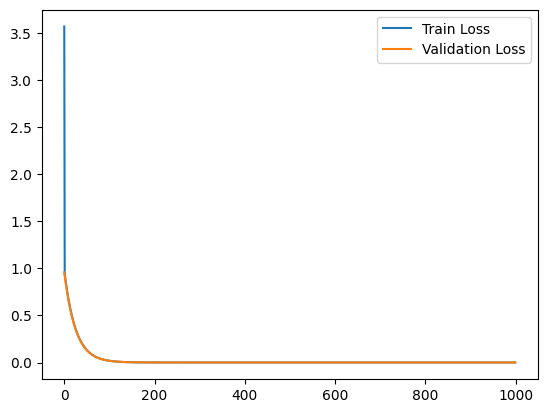

Test error:  0.0009989999999999953


In [24]:
import numpy as np
from neural_network import NeuralNetwork
# Initialize and train the neural network model
layers = [X_train.shape[1], 1, len(label_encoder.classes_)]
nn = NeuralNetwork(layer_structure=layers, learning_rate=0.0001, activation='relu')
nn.train(X_train, y_train, epochs=1000)

# Get predictions and calculate the mean squared error
y_pred = nn.get_prediction(X_test)
nn.plot_learning()
print("Test error: ",  np.average(np.average((y_test - y_pred) ** 2, axis=0)))   


In the following cell, we load the trained model and use it to predict the participant ID of 10 random sentences. 
We print the predicted and true participant IDs. You can choose one and get the models prediction in the next cell.

In [9]:
import src.data_processor as data_processor
from neural_network import NeuralNetwork
from sklearn.preprocessing import LabelEncoder
import numpy as np

# load the model
nn = NeuralNetwork(file='model.npy', layer_structure=None)

# Encode the target variable (PARTICIPANT_ID) using LabelEncoder
label_encoder = LabelEncoder()
unseen_data = data_processor.get_classify_data()
unseen_y = unseen_data.labels
unseen_y_encoded = data_processor.encode_participant_ids(label_encoder.fit_transform(unseen_y))
unseen_X = unseen_data.data

indices = np.random.choice(unseen_X.shape[0], 10, replace=False)
for i in indices:
    print(f"Index:{i}, Participant ID: {unseen_y[i]}, Keystroke features: {unseen_X[i]}")
# generate random indices
# print sentences and participant ids

# show 10 participants with their sentences. User selects one that is predicted by model

Index:4732, Participant ID: 490337, Keystroke features: [ 1.38765272e-09  5.96090950e-09 -3.41918149e-09  3.60003911e-08
  3.84119754e-08  3.40108186e-08  1.00792603e-08  1.80598252e-07
 -1.07608897e+00  1.80000000e+01]
Index:1710, Participant ID: 171927, Keystroke features: [-1.52235284e-09  2.51418281e-09 -6.13790452e-09  8.01448143e-09
  1.49945011e-08  6.19411548e-08  1.93300882e-09  6.62331664e-07
 -1.07608897e+00  2.30000000e+01]
Index:3598, Participant ID: 375002, Keystroke features: [ 9.30452047e-10  1.13585981e-08 -5.56879701e-09  7.26490240e-08
  1.03419339e-08  1.17161322e-08  2.41626100e-09  7.37995152e-08
 -1.07608897e+00  2.10000000e+01]
Index:867, Participant ID: 86862, Keystroke features: [-1.37148741e-09  2.48148472e-09 -6.48978649e-09  8.76717593e-09
  1.32697110e-08  1.24441475e-08  2.83047719e-09  6.26847145e-08
 -5.44420677e-02  1.90000000e+01]
Index:3217, Participant ID: 329386, Keystroke features: [-1.09894673e-09  1.55761560e-09 -4.46790495e-09  1.05497738e-09
 

In [15]:
index = 1614
pred, _ = nn.forward(unseen_X[index])
print(f"Predicted participant ID: {label_encoder.inverse_transform([np.argmax(pred)])}, True participant ID: {unseen_y[index]}")

Predicted participant ID: [1057], True participant ID: 166314
